In [63]:
#Importing packages
import numpy as np
import math
import pandas as pd
import sympy as sym
import random
import heapq
import random
import sys
import random
from time import time
import matplotlib.pyplot as plt
sym.init_printing()

# Classes, Functions and Definitions

In [2]:
# Class and Defining functions
class Game_theory:
    
    def __init__(self, payoff_matrix_list, actions):
        self.actions = actions
        payoff_matrix_array = np.array(payoff_matrix_list, dtype=[("x", object), ("y", object)])
        self.payoff_matrix_size = int(math.sqrt(len(payoff_matrix_array)))
        self.payoff_matrix = payoff_matrix_array.reshape(self.payoff_matrix_size, self.payoff_matrix_size)

    def Print_game(self):
        game = pd.DataFrame(np.nan, self.actions, self.actions, dtype=object)
        for i in range(self.payoff_matrix_size):
            for j in range(self.payoff_matrix_size):
                game.iat[i, j] = self.payoff_matrix[i][j]
        print(game)
        
def compute_Nash(self):
    max_payoff_player_1 = np.matrix(self.payoff_matrix["x"].max(0)).repeat(self.payoff_matrix_size, axis=0)
    boolean_player_1 = self.payoff_matrix["x"] == max_payoff_player_1
    max_payoff_player_2 = np.matrix(self.payoff_matrix["y"].max(1)).transpose().repeat(self.payoff_matrix_size, axis=1)
    boolean_player_2 = self.payoff_matrix["y"] == max_payoff_player_2
    boolean_player_1_2 = boolean_player_1 & boolean_player_2
    positions = np.where(boolean_player_1_2 == True)
    position = list(zip(positions[0], positions[1]))
    
    def styling_specific_cell(x,row_idx_1,col_idx_1,row_idx_2,col_idx_2):
        color = 'background-color: green'
        df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
        df_styler.iloc[row_idx_1, col_idx_1] = color
        df_styler.iloc[row_idx_2, col_idx_2] = color
        return df_styler
    
    idx_r_1,idx_c_1 = position[0]
    idx_r_2,idx_c_2 = position[1]
    
    
    game = pd.DataFrame(np.nan, self.actions, self.actions, dtype=object)
    for i in range(self.payoff_matrix_size):
        for j in range(self.payoff_matrix_size):
            game.iat[i, j] = self.payoff_matrix[i][j]
    
    
    
    return position,game.style.apply(styling_specific_cell,row_idx_1 = idx_r_1,
                 col_idx_1 = idx_c_1,
                 row_idx_2 = idx_r_2,
                 col_idx_2 = idx_c_2, axis = None)

In [3]:
Define= {"payoff_matrix_list":"List of elements in payoff matrix",
        "actions":"List of actions that can be taken by a palyer",
        "payoff_matrix_array":"Numpy array of the list of elements in the payoff matrix",
        "payoff_matrix_size":"Size of the Numpy array of the list of elements in the payoff matrix",
        "payoff_matrix":"The matrix that defines the Game",
        "game_battle_of_sexes":"Object that comprises of the game (battle of the sexes)",
        "max_payoff_player_1":"Maximum payoff for player 1",
        "max_payoff_player_2":"Maximum payoff for player 2",
        "boolean_player_1":"Boolean expressions for maximum payoffs in the payoff matrix for player 1",
        "boolean_player_2":"Boolean expressions for maximum payoffs in the payoff matrix for player 2",
        "boolean_player_1_2":"Boolean expressions for maximum payoffs in the payoff matrix for player 1 and 2",
        "position":"Co-ordinate positions for the Maximum payoffs for each player in the pyoff matrix = Positions for nash equillibrium"
}

# Battle of the Sexes

In [4]:
# Input the payoff matrix as a list in a variable
# Define an object for the claas of game theory for the game battle of sexes
battle_of_the_sexes = [(4, 3), (2, 2), (1, 1), (3, 4)]
game_battle_of_sexes = Game_theory(battle_of_the_sexes, ["Dog_race", "Ballet"])

# Position of the Nash equilibriums
position,game_nash_equillibrium = compute_Nash(game_battle_of_sexes)
print("The positions of Nash equilibriums are : ")
print(position)


print("The equilibrium events : ")
for event in position:
    print(game_battle_of_sexes.actions[event[0]], game_battle_of_sexes.actions[event[1]])

# We print the corresponding scores
print("The corresponding scores : ")
for event in position:
    print(game_battle_of_sexes.payoff_matrix[event[0]][event[1]])

The positions of Nash equilibriums are : 
[(0, 0), (1, 1)]
The equilibrium events : 
Dog_race Dog_race
Ballet Ballet
The corresponding scores : 
(4, 3)
(3, 4)


In [5]:
print("The payoff matrix for nash quillibrium is :")
game_nash_equillibrium

The payoff matrix for nash quillibrium is :


,Dog_race,Ballet
Dog_race,"(4, 3)","(2, 2)"
Ballet,"(1, 1)","(3, 4)"


# Dominant Stratergies

In [6]:
def getDominantStrategies(self, strict="True"):
    dominatedLines = []
    dominatedColumns = []
    findDominated = True
    while (
        findDominated
        and (len(dominatedLines) != self.payoff_matrix_size - 1)
        and (len(dominatedColumns) != self.payoff_matrix_size - 1)
    ):
        findDominated = False
        # dominated lines
        for i in range(self.payoff_matrix_size - 1):
            line1 = self.payoff_matrix["x"][i]
            line2 = self.payoff_matrix["x"][i + 1]
            if compare(self, line1, line2, dominatedColumns, strict):
                if i not in dominatedLines:
                    dominatedLines += [i]
                    findDominated = True
            if compare(self, line2, line1, dominatedColumns, strict):
                if i + 1 not in dominatedLines:
                    dominatedLines += [i + 1]
                    findDominated = True
        # dominated columns
        for i in range(self.payoff_matrix_size - 1):
            c1 = self.payoff_matrix["y"].transpose()[i]
            c2 = self.payoff_matrix["y"].transpose()[i + 1]
            if compare(self, c1, c2, dominatedLines, strict):
                if i not in dominatedColumns:
                    dominatedColumns += [i]
                    findDominated = True
            if compare(self, c2, c1, dominatedLines, strict):
                if i + 1 not in dominatedColumns:
                    dominatedColumns += [i + 1]
                    findDominated = True
    return result(self, dominatedLines, dominatedColumns)


def compare(self, l1, l2, tab, strict):
    dominated = True
    for i in range(self.payoff_matrix_size):
        if strict:
            if (l1[i] < l2[i] and i not in tab) or i in tab:
                dominated = dominated and True
            else:
                dominated = dominated and False
        else:
            if (l1[i] <= l2[i] and i not in tab) or i in tab:
                dominated = dominated and True
            else:
                dominated = dominated and False
    return dominated


def result(self, dominatedLines, dominatedColumns):
    x = list()
    y = list()
    res = list()

    for i in range(self.payoff_matrix_size):
        if i not in dominatedLines:
            x.append(i)
        if i not in dominatedColumns:
            y.append(i)

    for indX in x:
        for indY in y:
            res.append((indX, indY))
    return res


In [7]:
# We recover the indexes of the non-dominated strategy(ies):
print("Strongly dominated strategies method")
listOfCoordinates = getDominantStrategies(game_battle_of_sexes)
print("Non-dominated strategies indexes : ")
print(listOfCoordinates)

# We print the moves corresponding to these strategies
print("The corresponding rounds : ")
for cor in listOfCoordinates : 
    print(game_battle_of_sexes.actions[cor[0]], game_battle_of_sexes.actions[cor[1]])

# We print the corresponding scores
print("The corresponding scores : ")
for cor in listOfCoordinates : 
    print(game_battle_of_sexes.payoff_matrix[cor[0]][cor[1]])

print(" ")

# We recover the indexes of the non-dominated strategy(ies)::
print("Weakly dominated strategies method")
listOfCoordinates = getDominantStrategies(game_battle_of_sexes, strict="False")
print("Non-dominated strategies indexes : ")
print(listOfCoordinates)

# We print the moves corresponding to these strategies
print("The corresponding rounds : ")
for cor in listOfCoordinates : 
    print(game_battle_of_sexes.actions[cor[0]], game_battle_of_sexes.actions[cor[1]])

# We print the corresponding scores
print("The corresponding scores : ")
for cor in listOfCoordinates : 
    print(game_battle_of_sexes.payoff_matrix[cor[0]][cor[1]])

Strongly dominated strategies method
Non-dominated strategies indexes : 
[(0, 0), (0, 1), (1, 0), (1, 1)]
The corresponding rounds : 
Dog_race Dog_race
Dog_race Ballet
Ballet Dog_race
Ballet Ballet
The corresponding scores : 
(4, 3)
(2, 2)
(1, 1)
(3, 4)
 
Weakly dominated strategies method
Non-dominated strategies indexes : 
[(0, 0), (0, 1), (1, 0), (1, 1)]
The corresponding rounds : 
Dog_race Dog_race
Dog_race Ballet
Ballet Dog_race
Ballet Ballet
The corresponding scores : 
(4, 3)
(2, 2)
(1, 1)
(3, 4)


# Mixed Strategies

In [8]:
x, y  = sym.symbols('x, y')
a_11, a_12, a_21, a_22 = sym.symbols('a_11. a_12, a_21, a_22')
b_11, b_12, b_21, b_22 = sym.symbols('b_11, b_12, b_21, b_22')

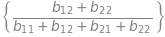

In [9]:
sym.solveset(y * (b_11 + b_21) -((1-y) * (b_12 + b_22)), y)

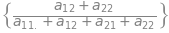

In [10]:
sym.solveset(x * (a_11 + a_21) -((1-x) * (a_12 + a_22)), x)

# Iterated Pisoner's Dilemma

In [21]:
COOPERATE = True
DEFECT = False
POINTS = {
    "FALSIFIED" : 0,
    "REWARD" : 3,
    "PUNISHMENT" : 1,
    "GREED" : 5,
}

In [31]:
class Random_Strategy:
    #Randomly choose to coorperate/defect each game
    NAME = "RANDOM"

    def execute(self, opponent):
        return random.choice((COOPERATE, DEFECT))

    def reflect(self, opponent, opponent_action):
        pass

    def reset(self):
        pass

class Always_Defect_Strategy:
    #Always defect
    NAME = "ALWAYS_DEFECT"

    def execute(self, opponent):
        return DEFECT

    def reflect(self, opponent, opponent_action):
        pass

    def reset(self):
        pass


class Always_Cooperate_Strategy:
    #Always cooperate
    NAME = "ALWAYS_COOPERATE"
   
    def execute(self, opponent):
        return COOPERATE

    def reflect(self, opponent, opponent_action):
        pass

    def reset(self):
        pass

class Tit_For_Tat_Strategy:
    NAME = "TIT_FOR_TAT"

    def __init__(self):
        #defiing a set to add those who cheat
        self.cheaters = set()

    def execute(self, opponent):
        if opponent in self.cheaters:
            self.cheaters.remove(opponent)
            return DEFECT
        else:
            return COOPERATE

    def reflect(self, opponent, opponent_action):
        if opponent_action == DEFECT:
            self.cheaters.add(opponent)

    def reset(self):
        self.cheaters = set()


class Exploit_Strategy:
    #Exploit the gullible opponent
    NAME = "EXPLOIT"

    def __init__(self):
        #defining set to add gullible opponents
        self.gullible = set()

    def execute(self, opponent):
        if opponent in self.gullible:
            self.gullible.remove(opponent)

            return DEFECT
        else:
            return COOPERATE

    def reflect(self, opponent, opponent_action):
        if opponent_action == COOPERATE:
            self.gullible.add(opponent)

    def reset(self):
        self.gullible = set()
        
class Grudger_Strategy:
    
    NAME = "GRUDGER"

    def __init__(self):
        
        self.cheaters = set()


    def execute(self, opponent):
        
        return DEFECT if opponent in self.cheaters else COOPERATE

    
    def reflect(self, opponent, opponent_action):
        
        if opponent_action == DEFECT:
            self.cheaters.add(opponent)


    def reset(self):
        
        self.cheaters = set()



In [32]:
# A dictionary of all strategies mapped to their names.
STRATEGIES = {
    "RANDOM" : Random_Strategy,
    "ALWAYS_DEFECT" : Always_Defect_Strategy,
    "ALWAYS_COOPERATE" : Always_Cooperate_Strategy,
    "TIT_FOR_TAT" : Tit_For_Tat_Strategy,
    "EXPLOIT" : Exploit_Strategy,
    "GRUDGER" : Grudger_Strategy,
}

# Game

In [64]:
class Simulation:
    def __init__(self,
                 player_count,
                 generation_count,
                 interaction_count,
                 population_shift):
        
        self.next_player_id = 0
        self.strategy_frequencies = self.initialize_strategy_frequencies()
        self.players = self.create_palyers(player_count)
        self.generation_count = generation_count
        self.interaction_count = interaction_count
        self.population_shift = population_shift
        

    def initialize_strategy_frequencies(self):
        #frequencies of strategies
        frequencies = {}
        for strategy in STRATEGIES.keys():
            frequencies[strategy] = []
            
        return frequencies


    def create_palyers(self, player_count):
        players = {}
        players_per_strategy = player_count / len(STRATEGIES)

        if players_per_strategy < 1:
            players_per_strategy = 1
        else:
            players_per_strategy = int(players_per_strategy)

        # Create a balanced number of players for each strategy.
        for name, Strategy in STRATEGIES.items():
            if len(players) >= player_count:
                break

            for player_number in range(0, players_per_strategy):
                players[self.next_player_id] = Player(self.next_player_id, Strategy())
                self.next_player_id += 1

        while len(players) < player_count:
            Strategy = random.choice(list(STRATEGIES.values()))
            players[self.next_player_id] = Player(self.next_player_id, Strategy())
            self.next_player_id += 1

        return players

    
    def play_game(self, player1, player2):
        player1_result = player1.play(player2)
        player2_result = player2.play(player1)
        
        if player1_result == COOPERATE:
            if player2_result == COOPERATE:
                player1.update(POINTS["REWARD"], player2, COOPERATE)
                player2.update(POINTS["REWARD"], player1, COOPERATE)
            elif player2_result == DEFECT:
                player1.update(POINTS["FALSIFIED"], player2, DEFECT)
                player2.update(POINTS["GREED"], player1, COOPERATE)
        elif player1_result == DEFECT:
            if player2_result == COOPERATE:
                player1.update(POINTS["GREED"], player2, COOPERATE)
                player2.update(POINTS["FALSIFIED"], player1, DEFECT)
            elif player2_result == DEFECT:
                player1.update(POINTS["PUNISHMENT"], player2, DEFECT)
                player2.update(POINTS["PUNISHMENT"], player1, DEFECT)
               
    def remove_weak_players(self):
        #Remove the weakest players from the simulation.
        weakest_players = heapq.nsmallest(self.population_shift, self.players.values())

        for player in weakest_players:
            del self.players[player.identifier]
        

    def replicate_strong_players(self):
        #Allow the strongest players to replicate in the simulation.
        strongest_players = heapq.nlargest(self.population_shift, self.players.values())

        for player in strongest_players:
            Strategy = STRATEGIES[player.strategy.NAME]
            self.players[self.next_player_id] = Player(self.next_player_id,
                                                       Strategy())
            self.next_player_id += 1
    

    def reset_players(self):
        for player in self.players.values():
            player.reset()


    def single_generation(self):
        self.reset_players()
        for player_id, player in self.players.items():
            
            # For each player, execute multiple interactions with
            # other players.
            for interaction in range(self.interaction_count):
                other = random.choice(list(self.players.values()))
                while other == player:
                    other = random.choice(list(self.players.values()))
                
                self.play_game(player, other)
                
        self.remove_weak_players()
        self.replicate_strong_players()

        # Add a new generation for each strategy in the frequencies dictionary.
        for category in self.strategy_frequencies.keys():
            self.strategy_frequencies[category].append(0)

        # Count the frequencies of each strategy for this generation.
        for player in self.players.values():
            self.strategy_frequencies[player.strategy.NAME][-1] += 1


    def run(self):
        for generation in range(self.generation_count):
            self.single_generation()

    
    def print_results(self):
        for category in self.strategy_frequencies.keys():
            #print(category + ":")
            for generation, count in enumerate(self.strategy_frequencies[category], 1):
                line = "gen {0: >3}, count {1: <3} | {2}"
                #print(line.format(generation, count, "X" * count))
                #return line,generation,count
            #print()
        return self.strategy_frequencies

class Player:
    def __init__(self, identifier, strategy):
        self.identifier = identifier
        self.strategy = strategy
        self.points = 0

    def __gt__(self, other):
        """Greater than comparison to another player."""
        return self.points > other.points

    def __lt__(self, other):
        """Less than comparison to another player."""
        return self.points < other.points

    def __ge__(self, other):
        """Greater than or equal to comparison to another player."""
        return self.points >= other.points

    def __le__(self, other):
        """Less than or equal to comparison to another player."""
        return self.points <= other.points

    def play(self, opponent):
        """Return the result of the player's strategy, when executed."""
        return self.strategy.execute(opponent)

    def update(self, points, opponent, opponent_action):
        self.points += points
        self.strategy.reflect(opponent, opponent_action)

    def reset(self):
        self.points = 0
        self.strategy.reset()

# Beginning of the program.
if __name__ == "__main__":
    
    PLAYERS = 100
    GENERATIONS = 100
    TURNOVER_DIVISOR = 10
    INTERACTION_MULTIPLIER = 100
    simulation = Simulation(PLAYERS,
                            GENERATIONS,
                            PLAYERS * INTERACTION_MULTIPLIER,
                            PLAYERS // TURNOVER_DIVISOR)
    simulation.run()
    Frequencies = simulation.print_results()


RANDOM:
ALWAYS_DEFECT:
ALWAYS_COOPERATE:
TIT_FOR_TAT:
EXPLOIT:
GRUDGER:


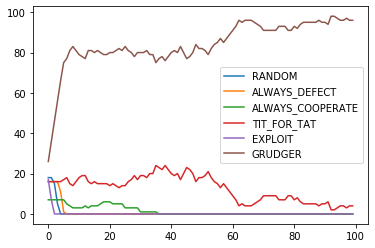

In [65]:
for Strategies, Freqs in Frequencies.items():
    plt.plot(Freqs)
    plt.legend(list(Frequencies.keys()))

# Q learning

Training [###################] 100%


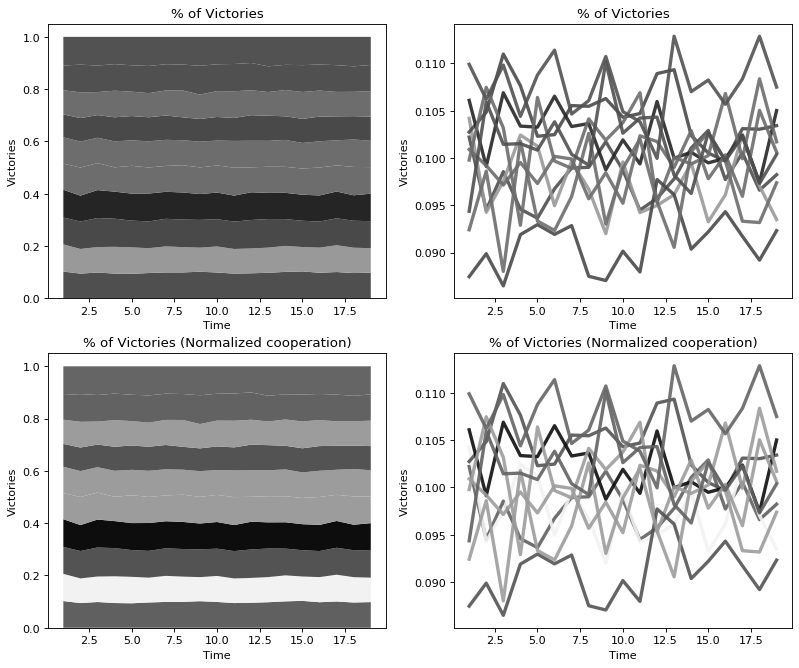

Score: 13 to 10
Player 1 wins!
Score: 15 to 12
Player 1 wins!
Score: 9 to 21
Player 2 wins!
Score: 17 to 14
Player 1 wins!
Score: 13 to 10
Player 1 wins!
Score: 11 to 14
Player 2 wins!
Score: 14 to 11
Player 1 wins!
Score: 11 to 14
Player 2 wins!
Score: 16 to 13
Player 1 wins!
Score: 16 to 13
Player 1 wins!
Score: 14 to 11
Player 1 wins!
Score: 9 to 15
Player 2 wins!
Score: 13 to 10
Player 1 wins!
Score: 15 to 12
Player 1 wins!
Score: 9 to 15
Player 2 wins!
Score: 16 to 13
Player 1 wins!
Score: 16 to 13
Player 1 wins!
Score: 6 to 24
Player 2 wins!
Score: 17 to 14
Player 1 wins!
Score: 16 to 13
Player 1 wins!
Score: 14 to 11
Player 1 wins!
Score: 15 to 12
Player 1 wins!
Score: 15 to 12
Player 1 wins!
Score: 10 to 13
Player 2 wins!
Score: 17 to 14
Player 1 wins!
Score: 15 to 12
Player 1 wins!
Score: 16 to 13
Player 1 wins!
Score: 7 to 22
Player 2 wins!
Score: 16 to 13
Player 1 wins!
Score: 9 to 21
Player 2 wins!
Score: 16 to 13
Player 1 wins!
Score: 16 to 13
Player 1 wins!
Score: 17 to 1

In [66]:
# Configuration section
population_size = 10 
mentor_instances = 5 
episode_length = 10 
dve = 0.7 
training_time = 1 
testing_episodes = 1000 

# Prisoner's dillema rewards [Player 1 reward, Player 2 reward]
reward_matrix = [[[2, 2], 
                [0, 3], 
                [3, 0], 
                [1, 1]]] 


# Human agents pick which action to perform
class AgentHuman:
    def pick_action(self, state):
        action = -1

        # Print the given state
        print("State: " + str(state) + " (" + str(len(state)) + "/" + str(episode_length) + ")")

        # Repeat until valid input provided
        while action not in [0, 1]:
            try:
                # Parse human's chosen action
                action = int(input("Choose Cooperate/Defect (0/1): "))
            except ValueError:
                # Prompt human for valid input
                print("Please input a number.")
        
        return action

    def reward_action(self, state, action, reward):
        pass

# Q agents learn the best action to perform for every state encountered
class AgentQ:
    def __init__(self, memory):
        self.wins = 0 
        self.losses = 0 
        self.Q = {} 
        self.memory = memory 
        self.epsilon_counter = 1 

    def get_q(self, state):
        quality1 = self.Q[str(state[-self.memory:])][0]
        quality2 = self.Q[str(state[-self.memory:])][1]

        return quality1, quality2

    def set_q(self, state, quality1, quality2):
        self.Q[str(state[-self.memory:])][0] = quality1
        self.Q[str(state[-self.memory:])][1] = quality2

    def normalize_q(self, state):
        quality1, quality2 = self.get_q(state)

        normalization = min(quality1, quality2)

        self.set_q(state, (quality1 - normalization) * 0.95, (quality2 - normalization) * 0.95)

    def max_q(self, state):
        quality1, quality2 = self.get_q(state)

        if quality1 == quality2 or random.random() < (1 / self.epsilon_counter):
            return random.randint(0, 1)
        elif quality1 > quality2:
            return 0
        else:
            return 1

    def pick_action(self, state):
        
        self.epsilon_counter += 0.5

        
        if str(state[-self.memory:]) not in self.Q:
            
            self.Q[str(state[-self.memory:])] = [0, 0]
    
        return self.max_q(state)

    def reward_action(self, state, action, reward):
        
        self.Q[str(state[-self.memory:])][action] += reward

        
        self.normalize_q(state)

    def mark_victory(self):
        self.wins += 1

    def mark_defeat(self):
        self.losses += 1

    def analyse(self):
        
        percent_won = 0
        if self.wins > 0:
            percent_won = float(self.wins) / (self.wins + self.losses)
        
        '''
        percent_lost = 0
        if self.losses > 0:
            percent_lost = float(self.losses) / (self.wins + self.losses)
        '''

        
        times_cooperated = 0
        times_defected = 0

        for state in self.Q:
            action = self.max_q(eval(state))

            if action == 0:
                times_cooperated += 1
            else:
                times_defected += 1

        
        percent_cooperated = 0
        if times_cooperated > 0:
            percent_cooperated = float(times_cooperated) / len(self.Q)

        '''
        percent_defected = 0
        if times_defected > 0:
            percent_defected = float(times_defected) / len(self.Q)
        '''

        
        return self.wins, percent_won, percent_cooperated

    def reset_analysis(self):
        self.wins = 0
        self.losses = 0


class AgentDefined:
    def __init__(self, strategy):
        self.wins = 0 
        self.losses = 0 
        self.strategy = strategy

    def pick_action(self, state):
        if self.strategy == 0: 
            if len(state) == 0: 
                return 0 
            else: 
                return state[-1] 
        elif self.strategy == 1: 
            if 1 in state: 
                return 1 
            else: 
                return 0 
        elif self.strategy == 2: 
            return random.randint(0, 1)

    def reward_action(self, state, action, reward):
        pass 

    def mark_victory(self):
        self.wins += 1

    def mark_defeat(self):
        self.losses += 1

    def analyse(self):
        
        percent_won = 0
        if self.wins > 0:
            percent_won = float(self.wins) / (self.wins + self.losses)
        
        percent_lost = 0
        if self.losses > 0:
            percent_lost = float(self.losses) / (self.wins + self.losses)

       
        return self.wins, percent_won


population = []


population_analysis = []
mentors = []



for i in range(population_size):
    population.append(AgentQ(random.randint(2, 5)))


for i in range(2):
    for j in range(mentor_instances):
        mentors.append(AgentDefined(i))


start_time = time()
remaining_time = training_time * population_size
last_remaining_time = int(remaining_time)
total_training_time = training_time * population_size


while remaining_time > 0:
 
    remaining_time = start_time + total_training_time - time()


    if 0 <= remaining_time < last_remaining_time:

        progress = 100 * (total_training_time - remaining_time) / total_training_time
        sys.stdout.write('\rTraining [{0}] {1}%'.format(('#' * int(progress / 5)).ljust(19), int(min(100, progress + 5))))
        sys.stdout.flush()
        last_remaining_time = int(remaining_time * 2) / float(2)


        if time() > start_time + 0.5:
            time_step = []
            for agent in population:
                time_step.append(agent.analyse())
                agent.reset_analysis()
            population_analysis.append(time_step)

    

    state1 = [] # State visible to player 1 (actions of player 2)
    state2 = [] # State visible to player 2 (actions of player 1)

    # Pick a random member of the population to serve as player 1
    player1 = random.choice(population)

    # Pick a random member of the population or a defined strategy to serve as player 2
    player2 = random.choice(population + mentors)

    for i in range(episode_length):
        action = None

        action1 = player1.pick_action(state1) # Select action for player 1
        action2 = player2.pick_action(state2) # Select action for player 2

        state1.append(action2) # Log action of player 2 for player 1
        state2.append(action1) # Log action of player 1 for player 2

    # Stores the total reward over all games in an episode
    total_reward1 = 0
    total_reward2 = 0

    for i in range(episode_length):
        action1 = state2[i]
        action2 = state1[i]

        reward1 = 0 # Total reward due to the actions of player 1 in the entire episode
        reward2 = 0 # Total reward due to the actions of player 2 in the entire episode

        # Calculate rewards for each player
        if action1 == 0 and action2 == 0: # Both players cooperate
            reward1 = reward_matrix[0][0][0]
            reward2 = reward_matrix[0][0][1]
        elif action1 == 0 and action2 == 1: # Only player 2 defects
            reward1 = reward_matrix[0][1][0]
            reward2 = reward_matrix[0][1][1]
        elif action1 == 1 and action2 == 0: # Only player 1 defects
            reward1 = reward_matrix[0][2][0]
            reward2 = reward_matrix[0][2][1]
        elif action1 == 1 and action2 == 1: # Both players defect
            reward1 = reward_matrix[0][3][0]
            reward2 = reward_matrix[0][3][1]

        total_reward1 += reward1
        total_reward2 += reward2

        player1.reward_action(state1[:i], action1, reward1 * dve) # Assign reward to action of player 1
        player2.reward_action(state2[:i], action2, reward2 * dve) # Assign reward to action of player 2

    # Assign reward for winning player
    if total_reward1 > total_reward2:
        reward_chunk = total_reward1 / episode_length * (1 - dve)

        for i in range(episode_length):
            action1 = state2[i]

            player1.reward_action(state1[:i], action1, reward_chunk)

            player1.mark_victory()
            player2.mark_defeat()
    elif total_reward2 > total_reward1:
        reward_chunk = total_reward2 / episode_length * (1 - dve)

        for i in range(episode_length):
            action2 = state1[i]

            player2.reward_action(state2[:i], action2, reward_chunk)

            player1.mark_victory()
            player2.mark_defeat()

# Start new line
print("")

# Plot analysis of AIs
victories_percent_x = []
victories_percent_y = []
victories_percent_colors = []

victories_percent_min_y = 1.0
victories_percent_max_y = 0.0

for i in range(len(population_analysis[-1])):
    victories_percent_y.append([])

    wins, percent_won, percent_cooperated = population_analysis[-1][i]

    victories_percent_colors.append(percent_cooperated)

    if percent_cooperated < victories_percent_min_y:
        victories_percent_min_y = percent_cooperated

    if percent_cooperated > victories_percent_max_y:
        victories_percent_max_y = percent_cooperated

row1_colors = []
row2_colors = []

min_color = 0.05
max_color = 0.95

for color in victories_percent_colors:
    normalized_color = (color - victories_percent_min_y) * (max_color - min_color) / (victories_percent_max_y - victories_percent_min_y) + min_color

    row1_colors.append(str(color))
    row2_colors.append(str(normalized_color))

i = 0
for time_step in population_analysis:
    victories_percent_x.append(i + 1)

    total_wins = 0

    for agent_analysis in time_step:
        wins, percent_won, percent_cooperated = agent_analysis

        total_wins += percent_won

    j = 0
    for agent_analysis in time_step:
        wins, percent_won, percent_cooperated = agent_analysis

        victories_percent = 0
        if wins > 0:
            victories_percent = float(percent_won) / total_wins

        victories_percent_y[j].append(victories_percent)

        j += 1

    i += 1

fig = plt.figure(figsize=(12, 10), dpi=80)

# Row 1
ax1 = fig.add_subplot(221)
ax1.set_title("% of Victories")
ax1.set_xlabel("Time")
ax1.set_ylabel("Victories")

ax1.stackplot(victories_percent_x, victories_percent_y, colors=row1_colors)

ax2 = fig.add_subplot(222)
ax2.set_title("% of Victories")
ax2.set_xlabel("Time")
ax2.set_ylabel("Victories")

for i in range(len(victories_percent_y)):
    ax2.plot(victories_percent_x, victories_percent_y[i], c=row1_colors[i], linewidth=3, alpha=0.9)

# Row 2
ax3 = fig.add_subplot(223)
ax3.set_title("% of Victories (Normalized cooperation)")
ax3.set_xlabel("Time")
ax3.set_ylabel("Victories")

ax3.stackplot(victories_percent_x, victories_percent_y, colors=row2_colors)

ax4 = fig.add_subplot(224)
ax4.set_title("% of Victories (Normalized cooperation)")
ax4.set_xlabel("Time")
ax4.set_ylabel("Victories")

for i in range(len(victories_percent_y)):
    ax4.plot(victories_percent_x, victories_percent_y[i], c=row2_colors[i], linewidth=3, alpha=0.9)

fig.savefig("figure.png")

plt.show()

# Testing mode
wins1 = 0
wins2 = 0

for i in range(testing_episodes):
    state1 = [] # State visible to player 1 (actions of player 2)
    state2 = [] # State visible to player 2 (actions of player 1)

    # Use a human to serve as player 1
    player1 = random.choice(population)

    # Use a random AI to serve as player 2
    player2 = random.choice(mentors)

    for i in range(episode_length):
        action1 = player1.pick_action(state1) # Allow player 1 to pick action
        action2 = player2.pick_action(state2) # Select action for player 2

        state1.append(action2) # Log action of player 2 for player 1
        state2.append(action1) # Log action of player 1 for player 2

    total_reward1 = 0
    total_reward2 = 0

    for i in range(episode_length):
        action1 = state2[i]
        action2 = state1[i]

        reward1 = 0 # Total reward due to the actions of player 1 in the entire episode
        reward2 = 0 # Total reward due to the actions of player 2 in the entire episode

        # Calculate rewards for each player
        if action1 == 0 and action2 == 0: # Both players cooperate
            reward1 = reward_matrix[0][0][0]
            reward2 = reward_matrix[0][0][1]
        elif action1 == 0 and action2 == 1: # Only player 2 defects
            reward1 = reward_matrix[0][1][0]
            reward2 = reward_matrix[0][1][1]
        elif action1 == 1 and action2 == 0: # Only player 1 defects
            reward1 = reward_matrix[0][2][0]
            reward2 = reward_matrix[0][2][1]
        elif action1 == 1 and action2 == 1: # Both players defect
            reward1 = reward_matrix[0][3][0]
            reward2 = reward_matrix[0][3][1]

        total_reward1 += reward1
        total_reward2 += reward2

    # Print the winning player and score
    print("Score: " + str(total_reward1) + " to " + str(total_reward2))
    if total_reward1 > total_reward2:
        print("Player 1 wins!")
        wins1 += 1
    elif total_reward2 > total_reward1:
        print("Player 2 wins!")
        wins2 += 1
    else:
        print("Tie!")

print("Player 1 won " + str(wins1) + " times")
print("Player 2 won " + str(wins2) + " times")
